In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split

In [2]:
# load data
data, meta = arff.loadarff("ckd_data_updated\\chronic_kidney_disease_full.arff")
ckd_df = pd.DataFrame(data)
ckd_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,b'1.020',b'1',b'0',b'?',b'normal',b'notpresent',b'notpresent',121.0,...,44.0,7800.0,5.2,b'yes',b'yes',b'no',b'good',b'no',b'no',b'ckd'
1,7.0,50.0,b'1.020',b'4',b'0',b'?',b'normal',b'notpresent',b'notpresent',NaN,...,38.0,6000.0,NaN,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
2,62.0,80.0,b'1.010',b'2',b'3',b'normal',b'normal',b'notpresent',b'notpresent',423.0,...,31.0,7500.0,NaN,b'no',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'
3,48.0,70.0,b'1.005',b'4',b'0',b'normal',b'abnormal',b'present',b'notpresent',117.0,...,32.0,6700.0,3.9,b'yes',b'no',b'no',b'poor',b'yes',b'yes',b'ckd'
4,51.0,80.0,b'1.010',b'2',b'0',b'normal',b'normal',b'notpresent',b'notpresent',106.0,...,35.0,7300.0,4.6,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'


In [3]:
# Converting all columns from bytes to strings
ckd_df["sg"] = ckd_df["sg"].str.decode("utf-8")
ckd_df["al"] = ckd_df["al"].str.decode("utf-8")
ckd_df["su"] = ckd_df["su"].str.decode("utf-8")
ckd_df["rbc"] = ckd_df["rbc"].str.decode("utf-8")
ckd_df["pc"] = ckd_df["pc"].str.decode("utf-8")
ckd_df["pcc"] = ckd_df["pcc"].str.decode("utf-8")
ckd_df["ba"] = ckd_df["ba"].str.decode("utf-8")
ckd_df["htn"] = ckd_df["htn"].str.decode("utf-8")
ckd_df["dm"] = ckd_df["dm"].str.decode("utf-8")
ckd_df["cad"] = ckd_df["cad"].str.decode("utf-8")
ckd_df["appet"] = ckd_df["appet"].str.decode("utf-8")
ckd_df["pe"] = ckd_df["pe"].str.decode("utf-8")
ckd_df["ane"] = ckd_df["ane"].str.decode("utf-8")
ckd_df["class"] = ckd_df["class"].str.decode("utf-8")
ckd_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,?,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,?,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [4]:
# Converting non numerical values into numerical values
ckd_df["sg"] = ckd_df["sg"].map({"1.005": 1.005, "1.010": 1.010, "1.015": 1.015, "1.020": 1.020, "1.025": 1.025})
ckd_df["al"] = ckd_df["al"].map({"0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5})
ckd_df["su"] = ckd_df["su"].map({"0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5})
ckd_df["rbc"] = ckd_df["rbc"].map({"normal": 0, "abnormal": 1})
ckd_df["pc"] = ckd_df["pc"].map({"normal": 0, "abnormal": 1})
ckd_df["pcc"] = ckd_df["pcc"].map({"present": 0, "notpresent": 1})
ckd_df["ba"] = ckd_df["ba"].map({"present": 0, "notpresent": 1})
ckd_df["htn"] = ckd_df["htn"].map({"yes": 0, "no": 1})
ckd_df["dm"] = ckd_df["dm"].map({"yes": 0, "no": 1})
ckd_df["cad"] = ckd_df["cad"].map({"yes": 0, "no": 1})
ckd_df["appet"] = ckd_df["appet"].map({"good": 0, "poor": 1})
ckd_df["pe"] = ckd_df["pe"].map({"yes": 0, "no": 1})
ckd_df["ane"] = ckd_df["ane"].map({"yes": 0, "no": 1})
ckd_df["class"] = ckd_df["class"].map({"ckd": 0, "notckd": 1})
ckd_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,1.0,1.0,121.0,...,44.0,7800.0,5.2,0.0,0.0,1.0,0.0,1.0,1.0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,1.0,1.0,NaN,...,38.0,6000.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0,0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,1.0,1.0,423.0,...,31.0,7500.0,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,0.0,1.0,117.0,...,32.0,6700.0,3.9,0.0,1.0,1.0,1.0,0.0,0.0,0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,1.0,1.0,106.0,...,35.0,7300.0,4.6,1.0,1.0,1.0,0.0,1.0,1.0,0


In [5]:
# Filling NaN values with the median of the column
ckd_df = ckd_df.fillna(ckd_df.median())
ckd_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,1.0,1.0,121.0,...,44.0,7800.0,5.2,0.0,0.0,1.0,0.0,1.0,1.0,0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,1.0,1.0,121.0,...,38.0,6000.0,4.8,1.0,1.0,1.0,0.0,1.0,1.0,0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,1.0,1.0,423.0,...,31.0,7500.0,4.8,1.0,0.0,1.0,1.0,1.0,0.0,0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,0.0,1.0,117.0,...,32.0,6700.0,3.9,0.0,1.0,1.0,1.0,0.0,0.0,0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,1.0,1.0,106.0,...,35.0,7300.0,4.6,1.0,1.0,1.0,0.0,1.0,1.0,0


In [6]:
# Define methods for logistic regression
def Sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
def Cost_function(X, y, weights, lambda_value):
    m = len(y)
    h = Sigmoid(np.dot(X, weights))
    # Implementing the cost function with regularization from the slides and textbook
    cost1 = y * np.log(h)
    cost0 = (1 - y) * np.log(1 - h)
    regularization = (lambda_value / (2 * m)) * np.sum(weights[1:] ** 2)
    Jw = (-1 / m) * ( np.sum(cost1 + cost0) ) + regularization
    return Jw
    
def Gradient_Descent(X, y, weights, lr, lambda_value, tol=1e-4, max_iters=100000):
    m = len(y)
    cost_list = []
    # max iters in case algorithm does not converge to prevent overworking
    for _ in range(max_iters):
        # Implementing the gradient descent algorithm from the slides and textbook
        h = Sigmoid(np.dot(X, weights))
        g = (1 / m) * np.dot(X.T, (h - y))
        regularization = (lambda_value / (2 * m)) * weights #np.concatenate([[0], weights[1:]])
        updated_weights = weights - lr * (g + regularization)
        
        # Convergence Criteria
        if np.linalg.norm(updated_weights - weights) < tol:
            return updated_weights
        
        weights = updated_weights
        
    print("Max Iterations Reached: Terminating")
    return updated_weights

def Predict(X, weights):
    preds = []
    h = Sigmoid(np.dot(X, weights))
    for i in h:
        if i > 0.5:
            preds.append(1)
        else:
            preds.append(0)
    return preds

def F1_Score(y_pred, y_true):
    # True Positive, True Negative, False Positive, False Negative
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y_pred)):
        if y_pred[i] == 1 and y_true[i] == 1:
            tp += 1
        elif y_pred[i] == 0 and y_true[i] == 0:
            tn += 1
        elif y_pred[i] == 1 and y_true[i] == 0:
            fp += 1
        elif y_pred[i] == 0 and y_true[i] == 1:
            fn += 1
            
    pre = tp / (tp + fp)
    rec = tp / (tp + fn)
    f1 = (2 * pre * rec) / (pre + rec)
    return f1      
                
def Logistic_Regression(X_train, X_test, y_train, y_test, lr, lambda_value):
    initial_weights = np.zeros((X_train.shape[1] + 1, 1))
    
    # Add a column for bias
    X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
    X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
    
    model_weights = Gradient_Descent(X_train, y_train, initial_weights, lr, lambda_value)
    
    train_preds = Predict(X_train, model_weights)
    test_preds = Predict(X_test, model_weights)
    
    return train_preds, test_preds

In [7]:
# Run logistic regression
lambda_values = np.arange(-2, 4, 0.2)
#lambda_value = 1
learning_rate = 1e-3
X = ckd_df.iloc[:, :24]
y = ckd_df.iloc[:, 24:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train_f1_list = []
test_f1_list = []
for lambda_value in lambda_values:
    train_preds, test_preds = Logistic_Regression(X_train, X_test, y_train, y_test, learning_rate, lambda_value)
    train_f1 = F1_Score(train_preds, y_train.to_numpy())
    test_f1 = F1_Score(test_preds, y_test.to_numpy())
    print(f"Train F1: {train_f1} for lambda: {lambda_value}")
    print(f"Test F1: {test_f1} for lambda: {lambda_value}")
    train_f1_list.append(train_f1)
    test_f1_list.append(test_f1)

C:\Users\alica\AppData\Local\Temp\ipykernel_2792\424766531.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Max Iterations Reached: Terminating
Train F1: 0.5380116959064328 for lambda: -2.0
Test F1: 0.5000000000000001 for lambda: -2.0
Max Iterations Reached: Terminating
Train F1: 0.7774086378737541 for lambda: -1.8
Test F1: 0.7499999999999999 for lambda: -1.8
Max Iterations Reached: Terminating
Train F1: 0.511904761904762 for lambda: -1.6
Test F1: 0.4680851063829786 for lambda: -1.6
Max Iterations Reached: Terminating
Train F1: 0.4662576687116564 for lambda: -1.4000000000000001
Test F1: 0.4680851063829786 for lambda: -1.4000000000000001
Max Iterations Reached: Terminating
Train F1: 0.7597402597402597 for lambda: -1.2000000000000002
Test F1: 0.7415730337078651 for lambda: -1.2000000000000002
Max Iterations Reached: Terminating
Train F1: 0.4662576687116564 for lambda: -1.0000000000000002
Test F1: 0.4444444444444444 for lambda: -1.0000000000000002
Max Iterations Reached: Terminating
Train F1: 0.45000000000000007 for lambda: -0.8000000000000003
Test F1: 0.4444444444444444 for lambda: -0.80000000

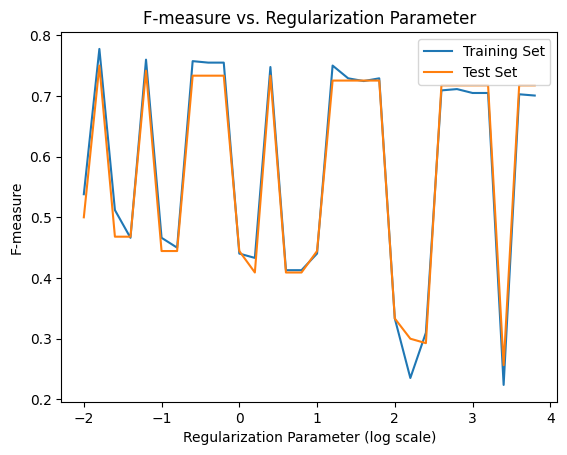

In [8]:
plt.plot(lambda_values, train_f1_list, label='Training Set')
plt.plot(lambda_values, test_f1_list, label='Test Set')
plt.xlabel('Regularization Parameter (log scale)')
plt.ylabel('F-measure')
plt.title('F-measure vs. Regularization Parameter')
plt.legend()
plt.show()

In [9]:
# Implement standardization and run logistic regression
def standardize(X):
    for i in range(X.shape[1]):
        X[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])
        
train_f1_list = []
test_f1_list = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
for lambda_value in lambda_values:
    train_preds, test_preds = Logistic_Regression(X_train, X_test, y_train, y_test, learning_rate, lambda_value)
    train_f1 = F1_Score(train_preds, y_train.to_numpy())
    test_f1 = F1_Score(test_preds, y_test.to_numpy())
    train_f1_list.append(train_f1)
    test_f1_list.append(test_f1)
    print(f"Train F1: {train_f1} for lambda: {lambda_value}")
    print(f"Test F1: {test_f1} for lambda: {lambda_value}")

C:\Users\alica\AppData\Local\Temp\ipykernel_2792\424766531.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Max Iterations Reached: Terminating
Train F1: 0.5604395604395604 for lambda: -2.0
Test F1: 0.5714285714285714 for lambda: -2.0
Max Iterations Reached: Terminating
Train F1: 0.7798742138364779 for lambda: -1.8
Test F1: 0.7027027027027027 for lambda: -1.8
Max Iterations Reached: Terminating
Train F1: 0.7798742138364779 for lambda: -1.6
Test F1: 0.7027027027027027 for lambda: -1.6
Max Iterations Reached: Terminating
Train F1: 0.7630769230769231 for lambda: -1.4000000000000001
Test F1: 0.6933333333333334 for lambda: -1.4000000000000001
Max Iterations Reached: Terminating
Train F1: 0.7725856697819314 for lambda: -1.2000000000000002
Test F1: 0.6933333333333334 for lambda: -1.2000000000000002
Max Iterations Reached: Terminating
Train F1: 0.7630769230769231 for lambda: -1.0000000000000002
Test F1: 0.6933333333333334 for lambda: -1.0000000000000002
Max Iterations Reached: Terminating
Train F1: 0.7630769230769231 for lambda: -0.8000000000000003
Test F1: 0.6933333333333334 for lambda: -0.80000000

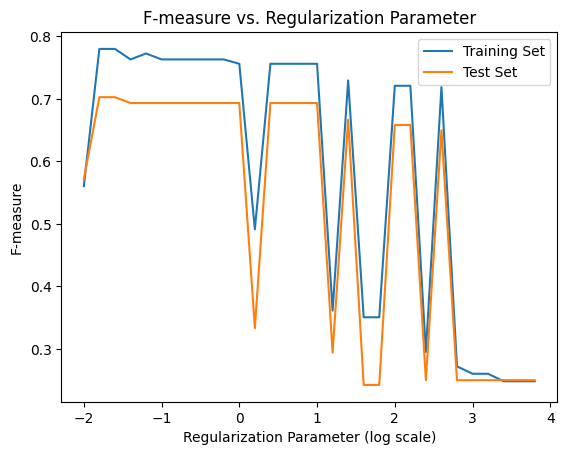

In [10]:
plt.plot(lambda_values, train_f1_list, label='Training Set')
plt.plot(lambda_values, test_f1_list, label='Test Set')
plt.xlabel('Regularization Parameter (log scale)')
plt.ylabel('F-measure')
plt.title('F-measure vs. Regularization Parameter')
plt.legend()
plt.show()

In [11]:
# Comparison with sklearn logistic regression to check my results
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
lr = LogisticRegression(max_iter=1000000)
lr.fit(X_train, y_train.values.ravel())
lr_score = lr.score(X_test, y_test)
print("Logistic Regression Score:", lr_score)
print("Train F1:", f1_score(y_train.to_numpy(), lr.predict(X_train)))
print("Test F1:", f1_score(y_test.to_numpy(), lr.predict(X_test)))

Logistic Regression Score: 0.975
Train F1: 0.9840000000000001
Test F1: 0.9615384615384616
